# Step 1: Installation and Setup

cifar 10 데이터 셋 `

In [ ]:
# Installing TensorFlow
# ! pip install -q tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [19]:
# Loading the dataset
#load_data() 메소드를 호출하면 4개를 넘겨준다(2개씩)x2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [ ]:
# Normalizing the images


In [20]:
X_train = X_train.astype(float) / 255

In [21]:
X_test = X_test.astype(float) / 255

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_train = X_train.reshape(-1, 32 * 32)
X_test = X_test.reshape(-1, 32 * 32)

In [22]:
X_train.shape

(50000, 32, 32, 3)

# Step 3: Building the CNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [24]:
from keras.layers import Conv2D, MaxPooling2D

In [108]:
model = Sequential()

In [109]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
model.add ( Conv2D( filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)) )


In [110]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add ( MaxPooling2D( 2, 2) ) 
model.add ( Conv2D( filters=32, kernel_size=(3, 3), padding='same', activation='relu') )

In [111]:
# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add ( MaxPooling2D( pool_size=(2 , 2), strides=2, padding='valid' ) )

In [112]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
model.add ( Conv2D( filters=64, kernel_size=(3, 3), padding='same', activation='relu') )


In [113]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
model.add ( Conv2D( filters=64, kernel_size=(3, 3), padding='same', activation='relu') )


In [114]:
# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add ( MaxPooling2D( pool_size=(2 , 2), strides=2, padding='valid' ) ) 

In [115]:
# Adding the dropout layer ( 0.4로 )
model.add ( Dropout(.2 ) )

In [116]:
# Adding the Flattening layer
model.add( Flatten() )

In [117]:
# Adding first dense layer
model.add( Dense(units= 512, activation='relu' ) )

In [118]:
# Adding second dense layer (output layer)
model.add (Dense( units=10, activation='softmax') )

In [119]:
# 모델 서머리 해본다.
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)         

# Step 4: Training the model

In [120]:
# Compiling the model
# metircs 는 sparse_categorical_accuracy 로 셋팅한다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.25)

Epoch 1/15
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7606 - accuracy: 0.3478 - val_loss: 1.2346 - val_accuracy: 0.5511
Epoch 2/15
1172/1172 [==============================] - 4s 3ms/step - loss: 1.1782 - accuracy: 0.5785 - val_loss: 1.0462 - val_accuracy: 0.6242
Epoch 3/15
1172/1172 [==============================] - 4s 3ms/step - loss: 0.9660 - accuracy: 0.6542 - val_loss: 0.8992 - val_accuracy: 0.6794
Epoch 4/15
1172/1172 [==============================] - 4s 4ms/step - loss: 0.8283 - accuracy: 0.7048 - val_loss: 0.8614 - val_accuracy: 0.7026
Epoch 5/15
1172/1172 [==============================] - 4s 4ms/step - loss: 0.7372 - accuracy: 0.7355 - val_loss: 0.8109 - val_accuracy: 0.7180
Epoch 6/15
1172/1172 [==============================] - 4s 4ms/step - loss: 0.6527 - accuracy: 0.7693 - val_loss: 0.8050 - val_accuracy: 0.7288
Epoch 7/15
1172/1172 [==============================] - 4s 4ms/step - loss: 0.5746 - accuracy: 0.7938 - val_loss: 0.7879 - val_accuracy:

# Step 5: Model evaluation and prediction

In [122]:
# model 을 evaluate 한다.
result = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.0234 - accuracy: 0.7284


In [123]:
result

[1.023362398147583, 0.7283999919891357]

In [124]:
# 테스트 셋으로 Predictions
y_pred = model.predict( X_test)

In [96]:
y_pred

array([[6.1375773e-05, 3.8608928e-07, 2.6827896e-05, ..., 5.9895510e-06,
        1.2425066e-06, 1.2839853e-06],
       [3.3140345e-06, 4.8792054e-04, 1.2755767e-13, ..., 1.6686891e-14,
        9.9950862e-01, 1.3955892e-07],
       [8.2007945e-02, 3.4844442e-04, 2.6038473e-05, ..., 4.5864482e-04,
        8.5601079e-01, 6.0344979e-02],
       ...,
       [2.7318570e-09, 2.0448353e-11, 3.5470759e-03, ..., 8.1317825e-03,
        1.8755155e-06, 9.7087440e-09],
       [4.7109116e-02, 9.4639921e-01, 7.0510089e-04, ..., 5.9471499e-06,
        6.4042672e-07, 2.8173844e-07],
       [2.5674815e-16, 3.4221306e-17, 5.6433947e-07, ..., 9.1553414e-01,
        4.9145953e-17, 7.9177278e-16]], dtype=float32)

In [125]:
# Confusion matrix 해본다.
from sklearn.metrics import confusion_matrix, accuracy_score

In [126]:
y_test.shape

(10000, 1)

In [127]:
y_pred = y_pred.argmax(axis=1)

In [99]:
y_pred

array([5, 8, 8, ..., 5, 1, 7])

In [98]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [128]:
cm = confusion_matrix(y_test, y_pred)

In [102]:
cm

array([[781,  14,  55,  29,  17,   5,  10,  14,  41,  34],
       [  7, 822,   8,  17,   2,   6,  10,   1,  22, 105],
       [ 50,   1, 665,  70,  54,  57,  54,  38,   4,   7],
       [ 18,   1,  46, 589,  41, 180,  53,  44,  11,  17],
       [ 15,   2,  81,  66, 673,  59,  37,  60,   5,   2],
       [ 10,   1,  41, 191,  29, 633,  23,  54,   9,   9],
       [  3,   1,  45,  95,  31,  38, 769,   8,   6,   4],
       [ 11,   1,  25,  52,  43,  43,  13, 797,   1,  14],
       [ 71,  19,  22,  20,  10,  12,   2,   4, 821,  19],
       [ 24,  53,   9,  27,   2,  14,  11,  16,  25, 819]])

In [129]:
# 정확도를 계산해 본다.

accuracy_score(y_test, y_pred)

0.7284

In [130]:
history.history['accuracy'][-1]

0.9111733436584473

In [131]:
history.history['loss'][-1]

0.2516447603702545

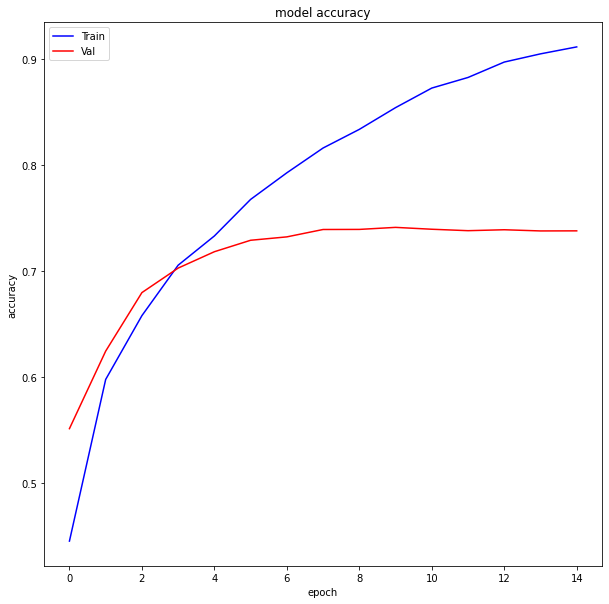

In [133]:
#overfitting 확인하기
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], color = 'b')
plt.plot(history.history['val_accuracy'], color ='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()


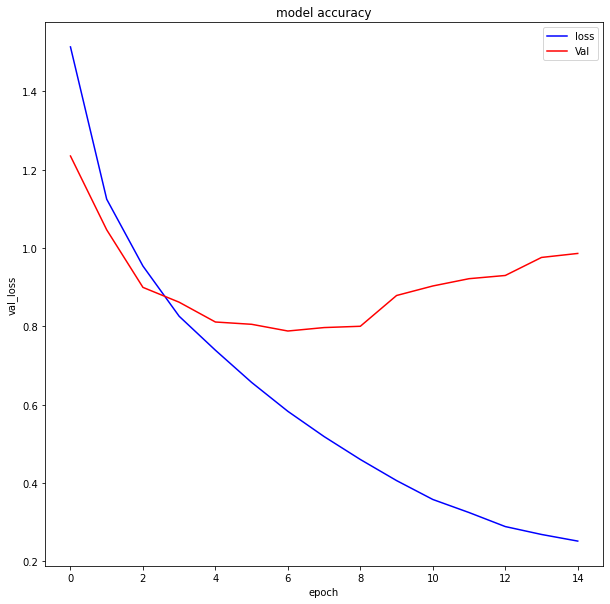

In [134]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], color = 'b')
plt.plot(history.history['val_loss'], color ='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.legend(['loss', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()
